In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\AML_Risk_Detection_from_Transaction_Behavior_Using_Synthetic_Financial_Data\PS_20174392719_1491204439457_log.csv")
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
print("Dataset shape:",df.shape)


Dataset shape: (6362620, 11)


In [4]:
print("\ncolumn types and non null:")
df.info()


column types and non null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
print("\nSummary statistics")
df.describe()


Summary statistics


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Classifying transaction based  on fraud risk
#### High -> if isfraud already marked
#### medium -> if transaction amount > 100000 also if it is a transfered to another personal
#### low -> if transaction is amount < 5000 if is for payment or debt type

In [6]:
def assign_risk(row):
    if row['isFraud'] ==1:
        return 'HIGH'
    elif row['amount'] >100000 and row['type'] in ['TRANSFER','CASH_OUT']:
        return 'MEDIUM'
    elif row['amount'] <5000 and row['type'] in ['PAYMENT','DEBIT']:
        return 'LOW'
    else:
        return 'MEDIUM'

# Apply the risk clasification
df['risk_level'] = df.apply(assign_risk,axis=1)

#preview result
df[['type','amount','isFraud','risk_level']].head(10)
    

,type,amount,isFraud,risk_level
0,PAYMENT,9839.64,0,MEDIUM
1,PAYMENT,1864.28,0,LOW
2,TRANSFER,181.00,1,HIGH
3,CASH_OUT,181.00,1,HIGH
4,PAYMENT,11668.14,0,MEDIUM
5,PAYMENT,7817.71,0,MEDIUM
6,PAYMENT,7107.77,0,MEDIUM
7,PAYMENT,7861.64,0,MEDIUM
8,PAYMENT,4024.36,0,LOW
9,DEBIT,5337.77,0,MEDIUM


In [7]:
df['risk_level'].value_counts()

risk_level
MEDIUM    5714647
LOW        639760
HIGH         8213
Name: count, dtype: int64

### risk_level (in bar chart)

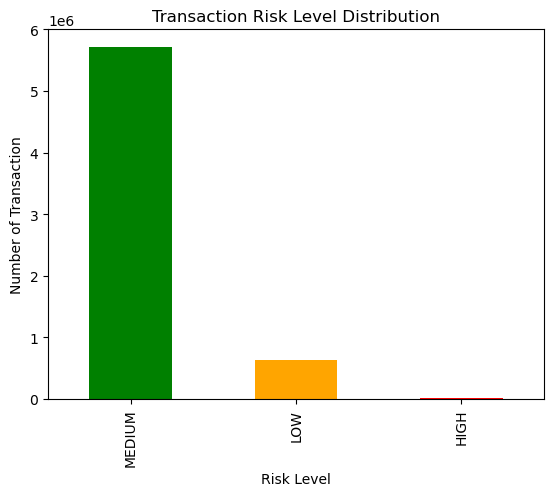

In [8]:
df['risk_level'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title("Transaction Risk Level Distribution")
plt.xlabel("Risk Level")
plt.ylabel("Number of Transaction")
plt.show()

###  HIGH-risk transactions occurred for each type

In [9]:
# Filter only HIGH risk transactions
high_risk =df[df['risk_level']=='HIGH']

# Count by transaction type
high_risk_by_type = high_risk['type'].value_counts()

#Display result
print(high_risk_by_type)



type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


C:\Users\amalm\AppData\Local\Temp\ipykernel_16828\2304526922.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_risk_by_type.index, y=high_risk_by_type.values, hue=None,palette='Reds_r',legend =False)


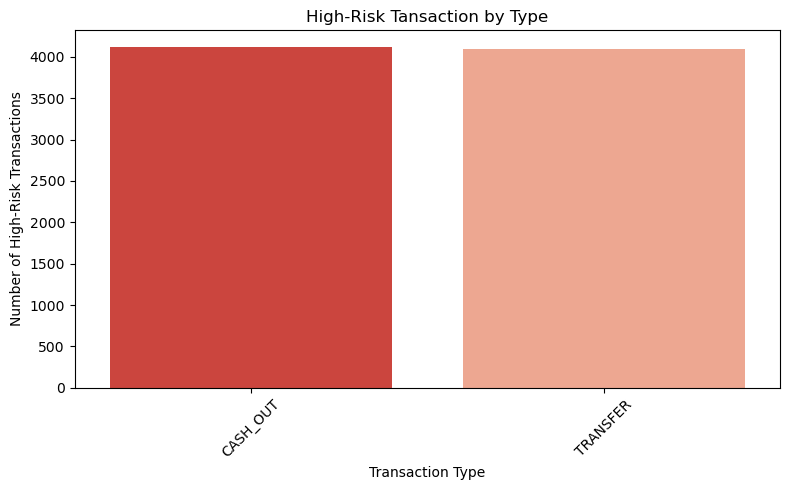

In [10]:
# visualization
plt.figure(figsize=(8,5))
sns.barplot(x=high_risk_by_type.index, y=high_risk_by_type.values, hue=None,palette='Reds_r',legend =False)
plt.title("High-Risk Tansaction by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of High-Risk Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [11]:
# Percentage risk per type

# Total transaction per type
total_by_type = df['type'].value_counts()

# High risk % = high risk/total
risk_ratio = (high_risk_by_type/total_by_type)*100

print(risk_ratio.sort_values(ascending=False))



type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN          NaN
DEBIT            NaN
PAYMENT          NaN
Name: count, dtype: float64


### Top Risky Accounts

In [12]:
# Filter high-risk or fraudalent transaction
risky_txns = df[(df['isFraud'] == 1) | (df['risk_level'] == 'HIGH')]

# Senders (nameOrig) initiated the most high-risk/fraud transactions
top_risky_senders = risky_txns['nameOrig'].value_counts().head(10)

# Receivers (nameDest) received the most high-risk/fraud transactions
top_risky_receivers = risky_txns['nameDest'].value_counts().head(10)

print(top_risky_senders)
print(top_risky_receivers)

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64


## Balance Analysis

### Mismatched Destination Balances

In [13]:
# Check if outbalanceDest + amount =! newbalanceDest
df['balance_mismatch'] =(df['oldbalanceDest'] + df['amount']).round(2) != df['newbalanceDest'].round(2)

# How many mismatches
print("Total mismatched transactions:", df['balance_mismatch'].sum())

# Look into mismatches by risk level
print(df.groupby('risk_level')['balance_mismatch'].sum())



Total mismatched transactions: 4364924
risk_level
HIGH         4880
LOW        619189
MEDIUM    3740855
Name: balance_mismatch, dtype: int64


In [14]:
# Trancsactions to Ghost Accounts (zero before and after)
ghost_accounts = df[(df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0) & (df['amount'] >0)]
print("Ghost account:",ghost_accounts.shape[0])

#checking how many of these are high-risk
print("High-risk ghost account txns:", ghost_accounts[ghost_accounts['risk_level'] == 'HIGH'].shape[0])

Ghost account: 2317276
High-risk ghost account txns: 4070


In [19]:
# Drained orgin accounts (new balance zero after sending)
df['orgin_drain'] = (df['oldbalanceDest'] > 0) & (df['newbalanceDest'].round(2) == 0)

# Total and high risk ones
print("Total orginal drain:",df['orgin_drain'].sum())
print(df.groupby('risk_level')['orgin_drain'].sum())

Total orginal drain: 122151
risk_level
HIGH          15
LOW          333
MEDIUM    121803
Name: orgin_drain, dtype: int64


### visualization for Drained Orgin Account

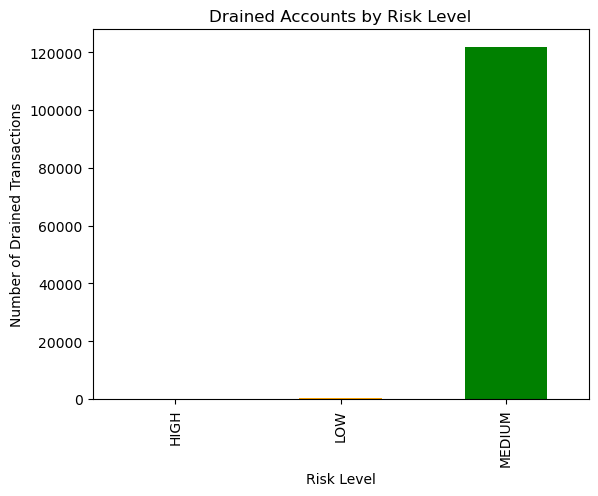

In [20]:
df.groupby('risk_level')['orgin_drain'].sum().plot(kind='bar', color=['red','orange','green'])
plt.title('Drained Accounts by Risk Level')
plt.ylabel('Number of Drained Transactions')
plt.xlabel('Risk Level')
plt.show()


While high-risk transactions were few, the majority of drained origin accounts fall under medium risk — potentially masking hidden fraudulent behavior under medium-risk flags.

In [22]:
risky_txns.to_csv(r"C:\AML_risk_detection\high_risk_transactions.csv", index=False)
